# 🚀 Advanced Data Analysis: S&P 500 Companies

This notebook build upon the exploratory data analysis (EDA) to uncover more intricate insights. We will employ a variety of techniques including statistical analysis, feature engineering, and advanced visualizations to provide a comprehensive understanding of the dataset.

### Topics Covered:

1. **Feature Engineering:**
   - **Financial Ratios:** Calculation and analysis of financial ratios such as Price-to-Earnings (P/E) Ratio, and others to evaluate the financial health and performance of the companies.
   - **Custom Features:** Development of custom features that may not be directly available in the dataset but can be derived from existing data to provide additional insights.

2. **Outlier Detection:**
   - Identification and treatment of outliers in key financial metrics to ensure the robustness of our analysis.
   - Techniques such as the Z-score method, and visualization methods like box plots will be used to detect and handle outliers.

3. **Sectoral Financial Comparisons:**
   - Comparative analysis of financial performance across different sectors within the S&P 500.
   - Use of statistical tests and visualizations to highlight sectoral differences in key metrics like revenue growth, profit margins, and P/E ratios.

4. **Clustering Interpretation:**
   - Application of clustering algorithms (e.g., K-means, Hierarchical Clustering) to group companies based on their financial characteristics.
   - Interpretation of the clusters to understand the underlying patterns and similarities among companies in the S&P 500.

5. **Dimensionality Reduction using PCA (Principal Component Analysis):**
   - Reduction of the dataset's dimensionality to simplify the analysis while retaining important information.
   - Use of PCA to identify the most significant components that explain the variance in the dataset and provide visualizations to interpret these components.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv("sp500_companies_cleaned.csv")
df.head()

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,is_bank,ebitda_clean,revenuegrowth,city,state,country,fulltimeemployees,longbusinesssummary,weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0,1.346610e+11,0.061,Cupertino,CA,United States,164000,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,0,6.118400e+10,1.224,Santa Clara,CA,United States,29600,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0,1.365520e+11,0.160,Redmond,WA,United States,228000,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0,1.115830e+11,0.110,Seattle,WA,United States,1551000,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0,1.234700e+11,0.151,Mountain View,CA,United States,181269,Alphabet Inc. offers various products and plat...,0.042309


## 🛠️ Feature Engineering

In [3]:
# Create Price-to-EBITDA and Employees per MarketCap
df["price_to_ebitda"] = df["currentprice"] / df["ebitda"].replace(0, np.nan)
df["employees_per_marketcap"] = df["fulltimeemployees"] / df["marketcap"].replace(0, np.nan)
df["log_marketcap"] = np.log1p(df["marketcap"])
df[["price_to_ebitda", "employees_per_marketcap", "log_marketcap"]].describe()

,price_to_ebitda,employees_per_marketcap,log_marketcap
count,4.730000e+02,5.020000e+02,502.000000
mean,1.086474e-07,1.133847e-06,24.481928
std,4.130543e-07,1.865059e-06,1.110270
min,-5.119205e-06,9.225835e-10,22.263161
25%,1.555699e-08,2.649110e-07,23.685139
50%,3.632065e-08,5.863085e-07,24.335905
75%,9.133920e-08,1.188909e-06,25.083873
max,3.995541e-06,2.340441e-05,28.978268


- price_to_ebitda: The ratio of the current stock price to EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization). This is a valuation metric, similar to P/E, but uses EBITDA instead of net income.
- employees_per_marketcap: The number of full-time employees divided by the company's market capitalization. This gives a sense of how many employees a company has relative to its market value.
- log_marketcap: The natural logarithm of (market capitalization + 1). This transformation is often used to reduce skewness and make the distribution of market cap more normal for analysis.

In [5]:
df[['price_to_ebitda', 'employees_per_marketcap', 'log_marketcap']].head()

,price_to_ebitda,employees_per_marketcap,log_marketcap
0,1.889857e-09,4.263262e-08,28.978268
1,2.201556e-09,8.972952e-09,28.824581
2,3.197317e-09,7.023881e-08,28.808466
3,2.015719e-09,6.558046e-07,28.491813
4,1.550255e-09,7.708244e-08,28.486128


## ⚠️ Outlier Detection (Z-Score Method)

Outlier detection is a crucial step in data analysis, as outliers can skew results and lead to incorrect conclusions. The Z-Score method is a popular statistical technique used to identify outliers in a dataset. It measures how many standard deviations an element is from the mean and flags elements that are too far from the mean as outliers.

In [6]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number]).fillna(0)))
outliers = (z_scores > 3).sum(axis=1)
df["outlier_count"] = outliers
df.sort_values("outlier_count", ascending=False).head()

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,is_bank,...,city,state,country,fulltimeemployees,longbusinesssummary,weight,price_to_ebitda,employees_per_marketcap,log_marketcap,outlier_count
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0,...,Seattle,WA,United States,1551000,"Amazon.com, Inc. engages in the retail sale of...",0.042550,2.015719e-09,6.558046e-07,28.491813,6
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,0,...,Santa Clara,CA,United States,29600,NVIDIA Corporation provides graphics and compu...,0.059350,2.201556e-09,8.972952e-09,28.824581,6
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0,...,Cupertino,CA,United States,164000,"Apple Inc. designs, manufactures, and markets ...",0.069209,1.889857e-09,4.263262e-08,28.978268,5
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0,...,Redmond,WA,United States,228000,Microsoft Corporation develops and supports so...,0.058401,3.197317e-09,7.023881e-08,28.808466,5
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0,...,Mountain View,CA,United States,181269,Alphabet Inc. offers various products and plat...,0.042309,1.550255e-09,7.708244e-08,28.486128,5


In the cell above, outlier detection is performed using the Z-score method. Here’s a step-by-step explanation:

1. **Z-score Calculation:**  
    The code computes the Z-score for each numeric column in the dataframe (`df`). The Z-score measures how many standard deviations a value is from the column mean. This is done using `stats.zscore()` from the `scipy` library, and missing values are filled with 0 to avoid errors.

2. **Outlier Identification:**  
    For each row, the code checks how many columns have a Z-score greater than 3 (i.e., the value is more than 3 standard deviations away from the mean, a common threshold for outliers). The sum of these occurrences per row is stored in the `outliers` variable.

3. **Storing Outlier Counts:**  
    The number of outlier features for each company is added as a new column, `outlier_count`, in the dataframe.

4. **Sorting and Display:**  
    The dataframe is sorted in descending order by `outlier_count` to show the companies with the most outlier features at the top.

This process helps identify companies with unusual financial or operational metrics compared to the rest of the S&P 500 dataset, which can be useful for further investigation or filtering in subsequent analyses.

## 📊 Sectoral Comparison of Financial Ratios
This section compares financial ratios across different sectors within the S&P 500 dataset. The goal is to highlight sectoral differences in key financial metrics such as P/E Ratio, and others. This comparison helps in understanding the relative financial performance and characteristics of companies in each sector.

### Key Steps:

1. **Select Financial Ratios:** Choose relevant financial ratios to compare.
2. **Group by Sector:** Aggregate data by sector to compute average or median financial ratios for each sector.
3. **Visualize Comparisons:** Use visualizations like bar charts, box plots, or heatmaps to display the differences in financial ratios between sectors.
4. **Analyze Results:** Interpret the visualizations to identify sectors with notable differences in financial performance.

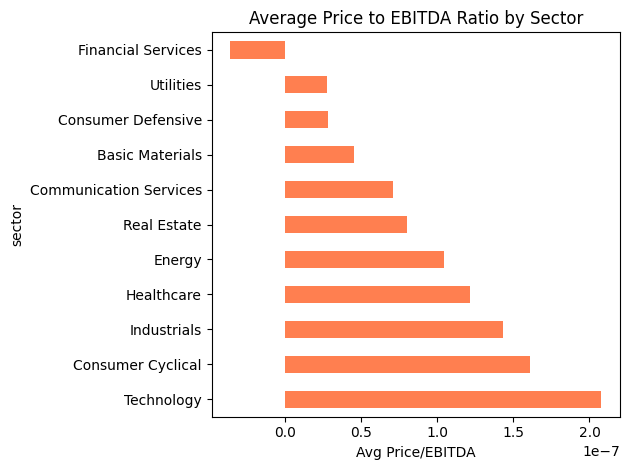

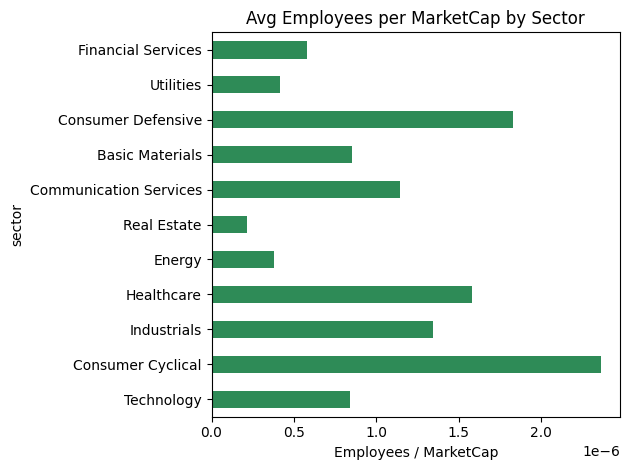

In [7]:
ratio_means = df.groupby("sector")[["price_to_ebitda", "employees_per_marketcap"]].mean().sort_values("price_to_ebitda", ascending=False)

plt.figure()
ratio_means["price_to_ebitda"].plot(kind="barh", title="Average Price to EBITDA Ratio by Sector", color="coral")
plt.xlabel("Avg Price/EBITDA")
plt.tight_layout()
plt.show()

plt.figure()
ratio_means["employees_per_marketcap"].plot(kind="barh", title="Avg Employees per MarketCap by Sector", color="seagreen")
plt.xlabel("Employees / MarketCap")
plt.tight_layout()
plt.show()

The code above performs a sectoral comparison of financial ratios in the S&P 500 dataset:

1. **Grouping by Sector:**  
    It groups the dataframe `df` by the `sector` column and calculates the mean of two financial ratios: `price_to_ebitda` and `employees_per_marketcap` for each sector. The result is stored in `ratio_means`.

2. **Sorting:**  
    The grouped means are sorted in descending order based on the average `price_to_ebitda` ratio.

3. **Visualization:**  
    - The first plot is a horizontal bar chart showing the average `price_to_ebitda` ratio for each sector.
    - The second plot is a horizontal bar chart showing the average `employees_per_marketcap` for each sector.
    - Both plots use `matplotlib` for visualization, with custom colors and labels for clarity.

These steps help to visually compare how different sectors perform on these key financial metrics, highlighting sectoral differences in valuation and workforce relative to market capitalization.

## 🧬 PCA (Principal Component Analysis)

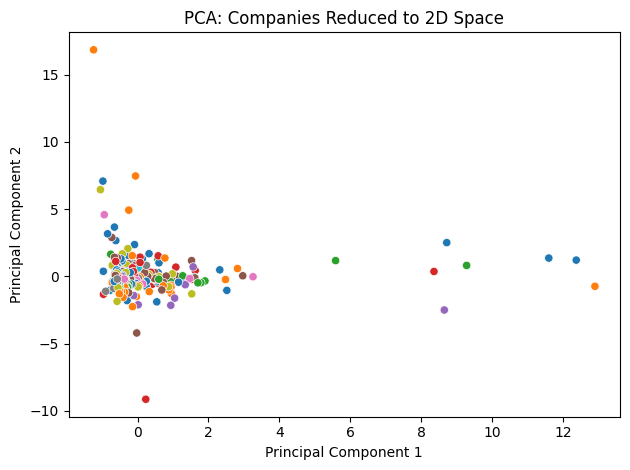

In [9]:
features = ["currentprice", "marketcap", "ebitda", "revenuegrowth", "fulltimeemployees", "price_to_ebitda", "employees_per_marketcap"]
X = df[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["pca_1"] = pca_result[:, 0]
df["pca_2"] = pca_result[:, 1]

plt.figure()
sns.scatterplot(x="pca_1", y="pca_2", data=df, hue="sector", palette="tab10", legend=False)
plt.title("PCA: Companies Reduced to 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

 The code and graph above perform Principal Component Analysis (PCA) on selected financial features of S&P 500 companies.

### Step-by-step explanation:
 1. Feature Selection: The features list contains key financial metrics (e.g., currentprice, marketcap, ebitda, revenuegrowth, etc.).
 2. Data Preparation: X is a DataFrame with these features, and missing values are filled with 0.
 3. Standardization: X_scaled is created by scaling X so each feature has mean 0 and standard deviation 1 (using StandardScaler). This is important for PCA. 4. PCA Transformation: PCA is performed to reduce the data to 2 principal components (pca_result). These components capture the most variance in the data.
 5. Results Storage: The first and second principal components are added to df as pca_1 and pca_2.
 6. Visualization: A scatter plot is created using seaborn, plotting each company in the 2D PCA space. Points are colored by sector.

### Interpretation:
 - Each point represents a company, positioned according to its financial characteristics summarized by the two principal components.
 - Companies with similar financial profiles are closer together.
 - Coloring by sector helps visualize how companies from different sectors cluster or spread out in this reduced space.

In [11]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)
print("Total Explained Variance (2 components):", explained_variance.sum())

Explained Variance Ratios: [0.30154393 0.23033989]
Total Explained Variance (2 components): 0.5318838179962082


 The cell above calculates and prints the explained variance ratios from the PCA analysis.

### Explanation:
- explained_variance is a numpy array containing the proportion of variance explained by each principal component (from the PCA performed earlier).
- The first print statement shows the variance explained by each of the two principal components.
- The second print statement shows the total variance explained by both components combined.

This helps you understand how much of the original data's variability is captured by the two principal components used in the PCA plot.